In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

Mounted at /content/drive


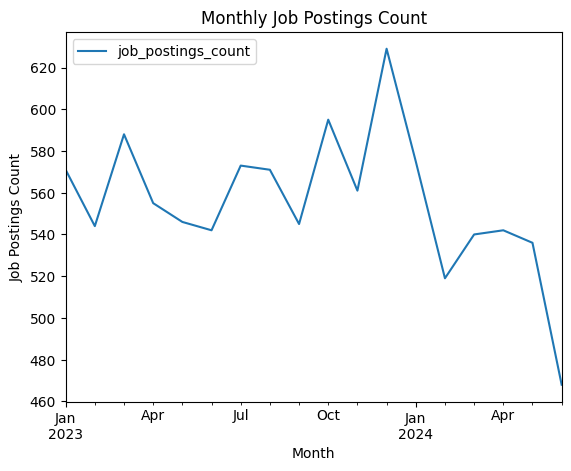

In [ ]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/datn/job_postings_dataset.csv')

# Convert 'time' column from Unix timestamp to datetime
data['time'] = pd.to_datetime(data['time'], unit='ms')

# Add 'month' column for monthly aggregation
data['month'] = data['time'].dt.to_period('M')

# Aggregate data by 'month' to get total job postings per month
aggregated_data = data.groupby('month').size().reset_index(name='job_postings_count')

# Convert 'month' back to datetime
aggregated_data['month'] = aggregated_data['month'].dt.to_timestamp()

# Set 'month' as index for time series analysis
aggregated_data.set_index('month', inplace=True)

# Split data into training and testing sets
split_idx = int(len(aggregated_data) * 0.8)
train_data, test_data = aggregated_data[:split_idx], aggregated_data[split_idx:]

# Plot the data
aggregated_data.plot()
plt.xlabel('Month')
plt.ylabel('Job Postings Count')
plt.title('Monthly Job Postings Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


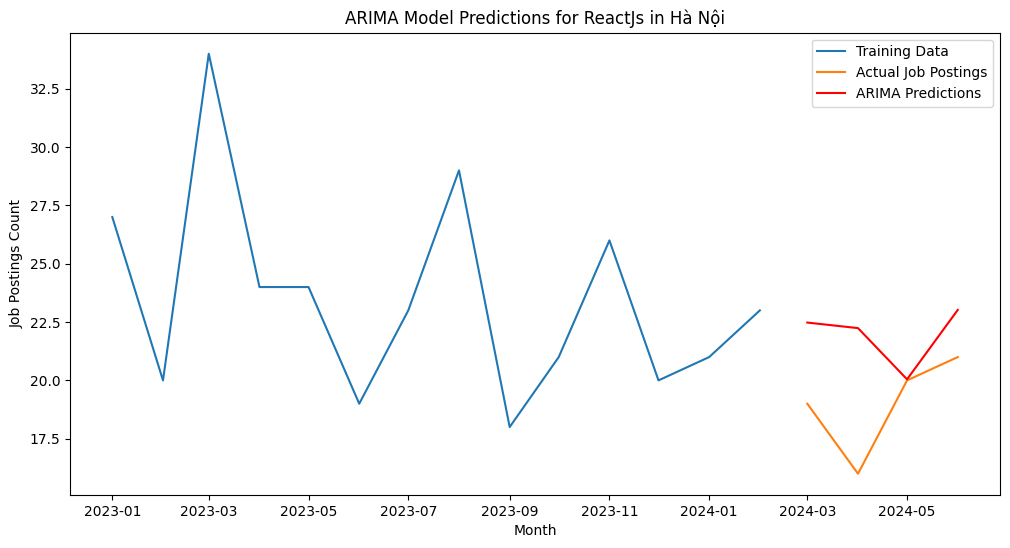

ARIMA RMSE for ReactJs in Hà Nội: 3.7121625466418635


In [ ]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/datn/job_postings_dataset.csv')

# Convert 'time' column from Unix timestamp to datetime
data['time'] = pd.to_datetime(data['time'], unit='ms')

# Add 'month' column for monthly aggregation
data['month'] = data['time'].dt.to_period('M')

# Aggregate data by 'job', 'city', 'month'
aggregated_data = data.groupby(['job', 'city', 'month']).size().reset_index(name='job_postings_count')

# Convert 'month' back to datetime
aggregated_data['month'] = aggregated_data['month'].dt.to_timestamp()

# Function to create and evaluate ARIMA model for each 'job' and 'city'
def evaluate_arima_model(job, city, order=(5,1,2)):
    # Filter data for specific job and city
    job_city_data = aggregated_data[(aggregated_data['job'] == job) & (aggregated_data['city'] == city)]
    job_city_data.set_index('month', inplace=True)

    # Split data into training and testing sets
    split_idx = int(len(job_city_data) * 0.8)
    train_data, test_data = job_city_data[:split_idx], job_city_data[split_idx:]

    # Fit the ARIMA model on the training data
    arima_model = ARIMA(train_data['job_postings_count'], order=order)
    arima_model_fit = arima_model.fit()

    # Make predictions on the test data
    start = len(train_data)
    end = len(train_data) + len(test_data) - 1
    arima_predictions = arima_model_fit.predict(start=start, end=end, dynamic=False)

    # Evaluate the model
    arima_rmse = np.sqrt(mean_squared_error(test_data['job_postings_count'], arima_predictions))

    # Plot the predictions against the actual values
    plt.figure(figsize=(12, 6))
    plt.plot(train_data['job_postings_count'], label='Training Data')
    plt.plot(test_data['job_postings_count'], label='Actual Job Postings')
    plt.plot(arima_predictions, label='ARIMA Predictions', color='red')
    plt.xlabel('Month')
    plt.ylabel('Job Postings Count')
    plt.title(f'ARIMA Model Predictions for {job} in {city}')
    plt.legend()
    plt.show()

    return arima_rmse

# Example: Evaluate ARIMA model for 'ReactJs' job in 'Hà Nội' city
arima_rmse = evaluate_arima_model('ReactJs', 'Hà Nội')
print(f'ARIMA RMSE for ReactJs in Hà Nội: {arima_rmse}')



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


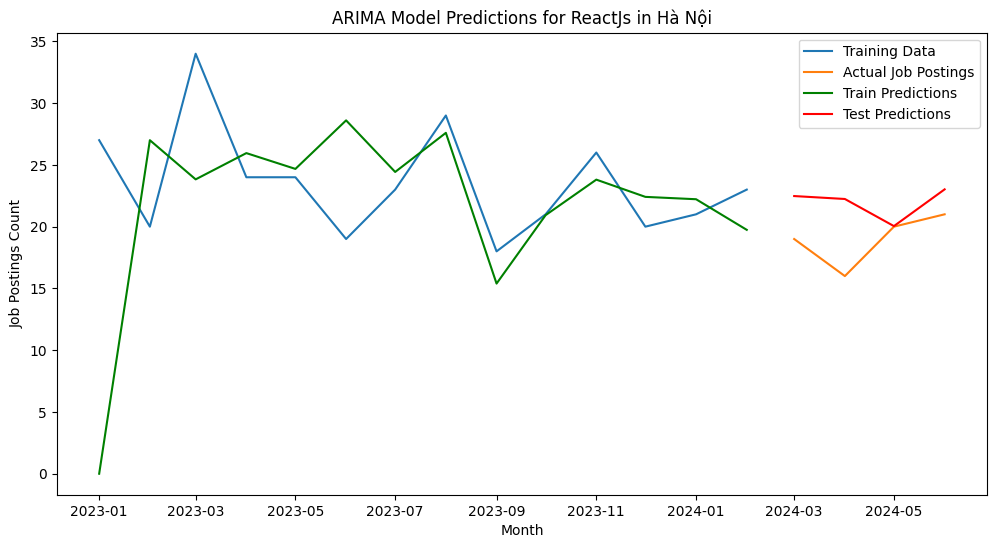

ARIMA Train RMSE: 8.500032443820846
ARIMA Test RMSE: 3.7121625466418635


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/datn/job_postings_dataset.csv')

# Convert 'time' column from Unix timestamp to datetime
data['time'] = pd.to_datetime(data['time'], unit='ms')

# Add 'month' column for monthly aggregation
data['month'] = data['time'].dt.to_period('M')

# Aggregate data by 'job', 'city', 'month'
aggregated_data = data.groupby(['job', 'city', 'month']).size().reset_index(name='job_postings_count')

# Convert 'month' back to datetime
aggregated_data['month'] = aggregated_data['month'].dt.to_timestamp()

# Function to create and evaluate ARIMA model for each 'job' and 'city'
def evaluate_arima_model(job, city, order=(5,1,2)):
    # Filter data for specific job and city
    job_city_data = aggregated_data[(aggregated_data['job'] == job) & (aggregated_data['city'] == city)]
    job_city_data.set_index('month', inplace=True)

    # Split data into training and testing sets
    split_idx = int(len(job_city_data) * 0.8)
    train_data, test_data = job_city_data[:split_idx], job_city_data[split_idx:]

    # Fit the ARIMA model on the training data
    arima_model = ARIMA(train_data['job_postings_count'], order=order)
    arima_model_fit = arima_model.fit()

    # Make predictions on the train data
    train_predictions = arima_model_fit.predict(start=0, end=len(train_data) - 1, dynamic=False)

    # Make predictions on the test data
    start = len(train_data)
    end = len(train_data) + len(test_data) - 1
    test_predictions = arima_model_fit.predict(start=start, end=end, dynamic=False)

    # Evaluate the model
    train_rmse = np.sqrt(mean_squared_error(train_data['job_postings_count'], train_predictions))
    test_rmse = np.sqrt(mean_squared_error(test_data['job_postings_count'], test_predictions))

    # Plot the predictions against the actual values
    plt.figure(figsize=(12, 6))
    plt.plot(train_data['job_postings_count'], label='Training Data')
    plt.plot(test_data['job_postings_count'], label='Actual Job Postings')
    plt.plot(pd.Series(train_predictions, index=train_data.index), label='Train Predictions', color='green')
    plt.plot(pd.Series(test_predictions, index=test_data.index), label='Test Predictions', color='red')
    plt.xlabel('Month')
    plt.ylabel('Job Postings Count')
    plt.title(f'ARIMA Model Predictions for {job} in {city}')
    plt.legend()
    plt.show()

    return train_rmse, test_rmse

# Example: Evaluate ARIMA model for 'ReactJs' job in 'Hà Nội' city
train_rmse, test_rmse = evaluate_arima_model('ReactJs', 'Hà Nội')
print(f'ARIMA Train RMSE: {train_rmse}')
print(f'ARIMA Test RMSE: {test_rmse}')


In [ ]:
print(f'ARIMA Train RMSE: {train_rmse}')
print(f'ARIMA Test RMSE: {test_rmse}')

ARIMA Train RMSE: 8.500032443820846
ARIMA Test RMSE: 3.7121625466418635


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


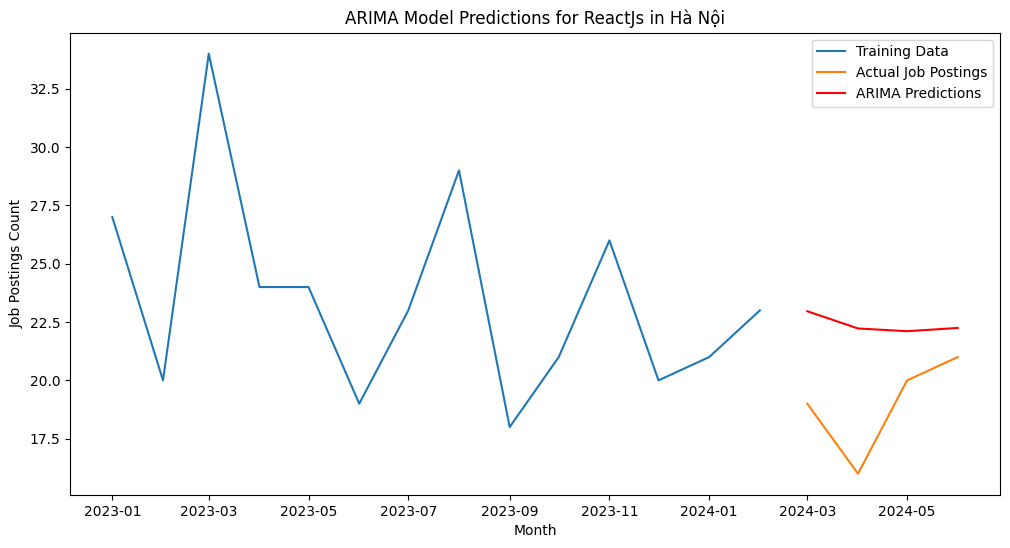

ARIMA RMSE for ReactJs in Hà Nội: 3.8880795254007263


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/datn/job_postings_dataset.csv')

# Convert 'time' column from Unix timestamp to datetime
data['time'] = pd.to_datetime(data['time'], unit='ms')

# Add 'month' column for monthly aggregation
data['month'] = data['time'].dt.to_period('M')

# Aggregate data by 'job', 'city', 'month'
aggregated_data = data.groupby(['job', 'city', 'month']).size().reset_index(name='job_postings_count')

# Convert 'month' back to datetime
aggregated_data['month'] = aggregated_data['month'].dt.to_timestamp()

# Function to create and evaluate ARIMA model for each 'job' and 'city'
def evaluate_arima_model(job, city, order=(2,1,2)):
    # Filter data for specific job and city
    job_city_data = aggregated_data[(aggregated_data['job'] == job) & (aggregated_data['city'] == city)]
    job_city_data.set_index('month', inplace=True)

    # Split data into training and testing sets
    split_idx = int(len(job_city_data) * 0.8)
    train_data, test_data = job_city_data[:split_idx], job_city_data[split_idx:]

    # Fit the ARIMA model on the training data
    arima_model = ARIMA(train_data['job_postings_count'], order=order)
    arima_model_fit = arima_model.fit()

    # Make predictions on the test data
    start = len(train_data)
    end = len(train_data) + len(test_data) - 1
    arima_predictions = arima_model_fit.predict(start=start, end=end, dynamic=False)

    # Evaluate the model
    arima_rmse = np.sqrt(mean_squared_error(test_data['job_postings_count'], arima_predictions))

    # Plot the predictions against the actual values
    plt.figure(figsize=(12, 6))
    plt.plot(train_data['job_postings_count'], label='Training Data')
    plt.plot(test_data['job_postings_count'], label='Actual Job Postings')
    plt.plot(arima_predictions, label='ARIMA Predictions', color='red')
    plt.xlabel('Month')
    plt.ylabel('Job Postings Count')
    plt.title(f'ARIMA Model Predictions for {job} in {city}')
    plt.legend()
    plt.show()

    return arima_rmse


# Example: Evaluate ARIMA model for 'ReactJs' job in 'Hà Nội' city
arima_rmse = evaluate_arima_model('ReactJs', 'Hà Nội')
print(f'ARIMA RMSE for ReactJs in Hà Nội: {arima_rmse}')

In [ ]:
def predict_future_arima(job, city, order=(2,1,2), future_periods=12):
    # Filter data for specific job and city
    job_city_data = aggregated_data[(aggregated_data['job'] == job) & (aggregated_data['city'] == city)]
    job_city_data.set_index('month', inplace=True)

    # Fit the ARIMA model on the entire data
    arima_model = ARIMA(job_city_data['job_postings_count'], order=order)
    arima_model_fit = arima_model.fit()

    # Predict future job postings
    future_predictions = arima_model_fit.forecast(steps=future_periods)

    return future_predictions

# Example: Predict future job postings for 'ReactJs' in 'Hà Nội' for the next 12 months
future_predictions_arima = predict_future_arima('ReactJs', 'Hà Nội', future_periods=6)
print(future_predictions_arima)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2024-07-01    18.810716
2024-08-01    20.140118
2024-09-01    19.750466
2024-10-01    19.536818
2024-11-01    19.952932
2024-12-01    19.606133
Freq: MS, Name: predicted_mean, dtype: float64
